In [77]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits, ascii
import matplotlib.colors as colors
import pandas as pd
from scipy.ndimage import median_filter

In [78]:
flat_on_f = 'C:\\Users\\bazar\\Desktop\\TrapD\\310IMG50_flaton_JHK.fits'
flat_off_f = 'C:\\Users\\bazar\\Desktop\\TrapD\\310IMG55_flatoff_JHK.fits'

In [79]:
hdu_list = fits.open(flat_on_f)
flat_on = hdu_list[0].data

hdu_list = fits.open(flat_off_f)
flat_off = hdu_list[0].data

In [80]:
flat_on = np.asarray([[float(y) for y in x] for x in flat_on])
flat_off = np.asarray([[float(y) for y in x] for x in flat_off])

In [81]:
flat = flat_on - flat_off

In [82]:
flat

array([[-17.,  -9., -12., ...,  -8.,  -9., -23.],
       [  2.,  11.,  -8., ...,  12.,  10.,   6.],
       [ 10.,   6.,  10., ...,  19.,  13.,  -1.],
       ...,
       [ -7.,  -9.,  -6., ..., -13.,   5., -11.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

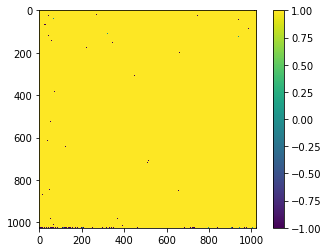

In [83]:
plt.imshow(flat, interpolation = 'nearest', vmin=-1, vmax=1)
plt.colorbar()

Test

In [84]:
for column in range(flat.shape[1]):
    flat[:,column] = flat[:,column] / np.median(flat[250:750,column])

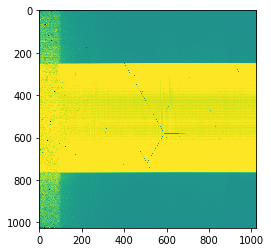

In [85]:
plt.imshow(flat, interpolation = 'nearest', vmin=-1, vmax=1)

In [86]:
esk_a = 'C:\\Users\\bazar\\Desktop\\TrapD\\ABditherTrapD\\20200309.007.fits'
esk_b = 'C:\\Users\\bazar\\Desktop\\TrapD\\ABditherTrapD\\20200309.006.fits'

In [87]:
hdu_list = fits.open(esk_a)
esk_a = hdu_list[0].data

hdu_list = fits.open(esk_b)
esk_b = hdu_list[0].data

In [88]:
esk_a = np.asarray([[float(y) for y in x] for x in esk_a])
esk_b = np.asarray([[float(y) for y in x] for x in esk_b])

In [89]:
esk_ab = esk_a-esk_b

In [90]:
esk = esk_ab/flat

C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


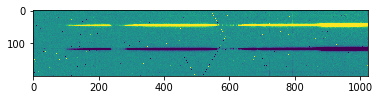

In [91]:
imgplot = plt.imshow(esk[:][500:700], interpolation = 'nearest', vmin=-100, vmax=100)

In [92]:
from scipy.ndimage import median_filter
#img[img > 4000] = 4001
#img[img < -4000] = -4001
no_nans = esk[np.where(np.isnan(esk))] = 4001
blurred = median_filter(esk, size=2)
difference = np.abs(esk - blurred)
threshold = 10
print(threshold)

hot_pixels = np.nonzero((np.abs(difference[1:-1,1:-1])>threshold) )
hot_pixels = np.array(hot_pixels) + 1 #because we ignored the first row and first column

esk_fix = np.copy(esk) #This is the image with the hot pixels removed
for y,x in zip(hot_pixels[0],hot_pixels[1]):
    esk_fix[y,x]=blurred[y,x]

C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  
C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


10


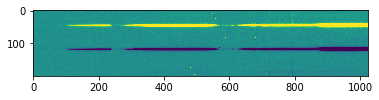

In [93]:
imgplot = plt.imshow(esk_fix[:][500:700], interpolation = 'nearest', vmin=-100, vmax=100)

1024


(180.0, 1000.0)

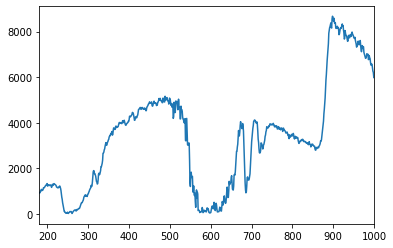

In [94]:
pos_spec = esk_fix[:][540:550]
pos_spec1d = np.sum(pos_spec,axis=0)
print(len(pos_spec1d))

plt.plot(pos_spec1d)
plt.xlim(180.0,1000.0)
#plt.ylim(0,500)

1024


(180.0, 1000.0)

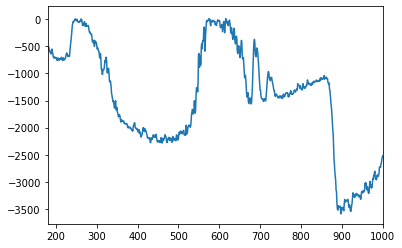

In [95]:
neg_spec = esk_fix[:][618:628]
neg_spec1d = np.sum(neg_spec,axis=0)
print(len(neg_spec1d))

plt.plot(neg_spec1d)
plt.xlim(180.0,1000.0)
#plt.ylim(-500,0)

(180.0, 1000.0)

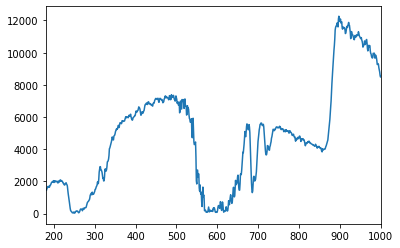

In [96]:
spec1d = pos_spec1d - neg_spec1d
plt.plot(spec1d)
plt.xlim(180.0,1000.0)

In [97]:
# Ar data
ar_on_f = 'C:\\Users\\bazar\\Desktop\\AS441_Lab3_2\\20200315.133.fits'
ar_off_f = 'C:\\Users\\bazar\\Desktop\\AS441_Lab3_2\\20200315.138.fits'
ar_on_hdu = fits.open(ar_on_f)
ar_off_hdu = fits.open(ar_off_f)
ar = (ar_on_hdu[0].data*1.0 - ar_off_hdu[0].data*1.0)/flat


C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [98]:
no_nans_ar = ar[np.where(np.isnan(ar))] = 4001
blurred = median_filter(ar, size=2)
difference = np.abs(ar - blurred)
threshold = 10
print(threshold)

hot_pixels = np.nonzero((np.abs(difference[1:-1,1:-1])>threshold) )
hot_pixels = np.array(hot_pixels) + 1 #because we ignored the first row and first column

ar_fix = np.copy(ar) #This is the image with the hot pixels removed
for y,x in zip(hot_pixels[0],hot_pixels[1]):
    ar_fix[y,x]=blurred[y,x]

C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bazar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


10


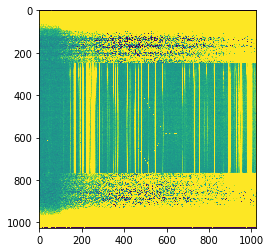

In [99]:
imgplot = plt.imshow(ar_fix[:][:], interpolation = 'nearest', vmin=-100, vmax=100)

1024


(180.0, 1000.0)

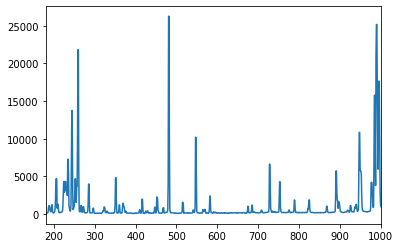

In [100]:
pos_spec_ar_fix = ar_fix[:][540:550]
pos_spec1d_ar_fix = np.sum(pos_spec_ar_fix,axis=0)
print(len(pos_spec1d_ar_fix))

plt.plot(pos_spec1d_ar_fix)
plt.xlim(180.0,1000.0)
#plt.ylim(0,500)

(180.0, 1000.0)

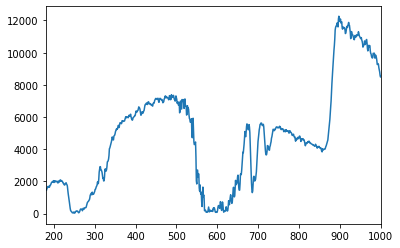

In [101]:
spec1d = pos_spec1d - neg_spec1d
plt.plot(spec1d)
plt.xlim(180.0,1000.0)

In [102]:
path = 'C:\\Users\\bazar\\Downloads\\Ar_lines.csv'

In [103]:
df = pd.read_csv(path)

In [104]:
ar_lines = ascii.read(path)
strength = np.array(ar_lines['ï»¿strength'])
wl = np.array(ar_lines['wavelength'])

In [105]:
for i in range(len(wl)):
    if len(wl[i]) > 10:
        wl[i] = wl[i][6:]

In [106]:
wl = [float(x)/10000.0 for x in wl]

(0, 50)

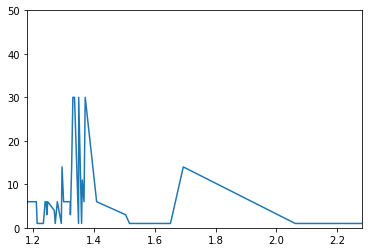

In [107]:
plt.plot(wl,strength)
plt.xlim(1.18,2.28)
plt.ylim(0,50)

1024


(0, 10000)

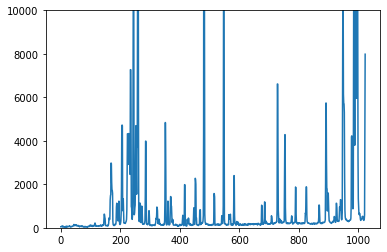

In [108]:
pos_spec_ar_fix = ar_fix[:][540:550]
pos_spec1d_ar_fix = np.sum(pos_spec_ar_fix,axis=0)
print(len(pos_spec1d_ar_fix))

plt.plot(pos_spec1d_ar_fix)
#plt.xlim(180.0,1000.0)
plt.ylim(0,10000)

(180.0, 1000.0)

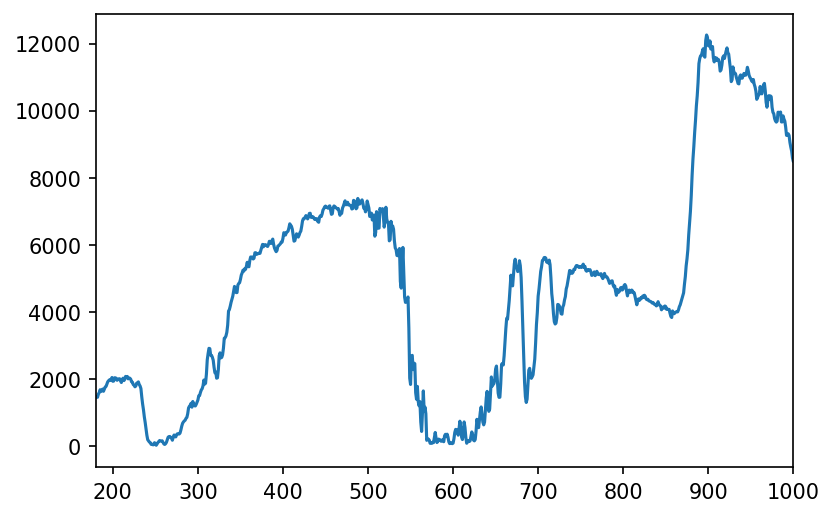

In [145]:
spec1d = pos_spec1d - neg_spec1d
plt.plot(spec1d)
plt.xlim(180.0,1000.0)

In [127]:
def quad(px):
    wl = 1.179911 + 0.0009338844*px + 3.568284e-7*px**2
    return wl

In [128]:
def quad(px):
    wl = 1.179911 + 0.0009338844*px + 3.568284e-7*px**2
    return wl
ind = range(len(spec1d))

wl_lst = []

for i in ind:
    wl_lst.append(quad(i))

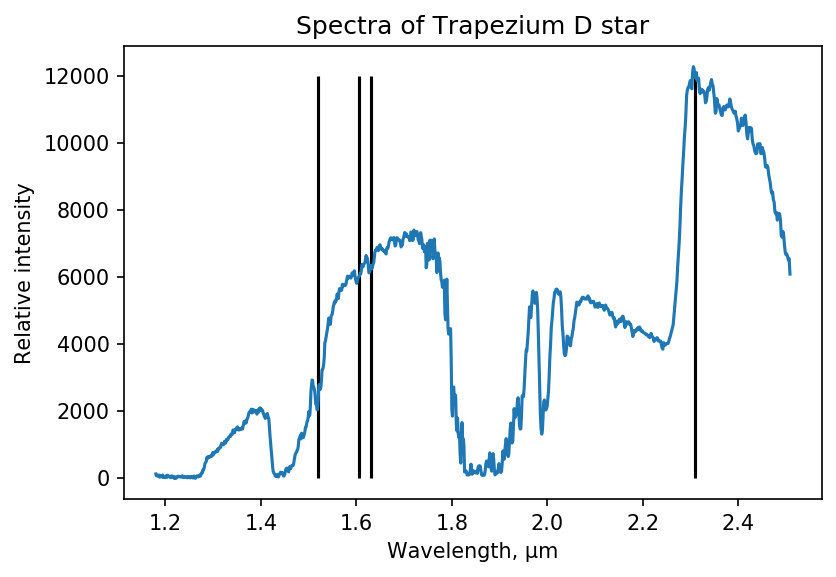

In [176]:
plt.plot(wl_lst, spec1d)
plt.rcParams['figure.dpi'] = 150
#plt.xlim(2.2,2.5)
plt.title('Spectra of Trapezium D star')
plt.xlabel('Wavelength, μm')
plt.ylabel('Relative intensity')
plt.savefig('C:\\Users\\bazar\\Desktop\\TrapD.png')
plt.vlines(1.52, -0, 12000)
plt.vlines(1.605, -0, 12000)
plt.vlines(1.63, -0, 12000)
plt.vlines(2.31, -0, 12000)

(180.0, 1000.0)

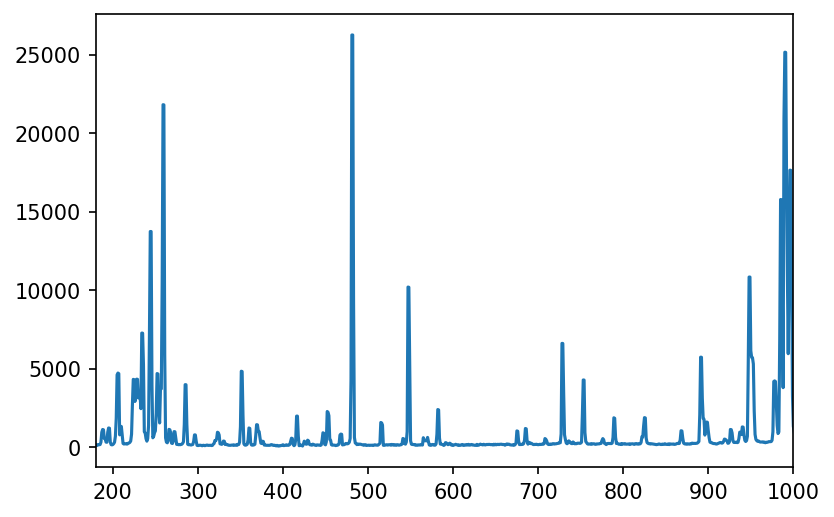

In [130]:
plt.plot(pos_spec1d_ar_fix)
plt.xlim(180.,1000.0)
#plt.ylim(-5000.,25000)

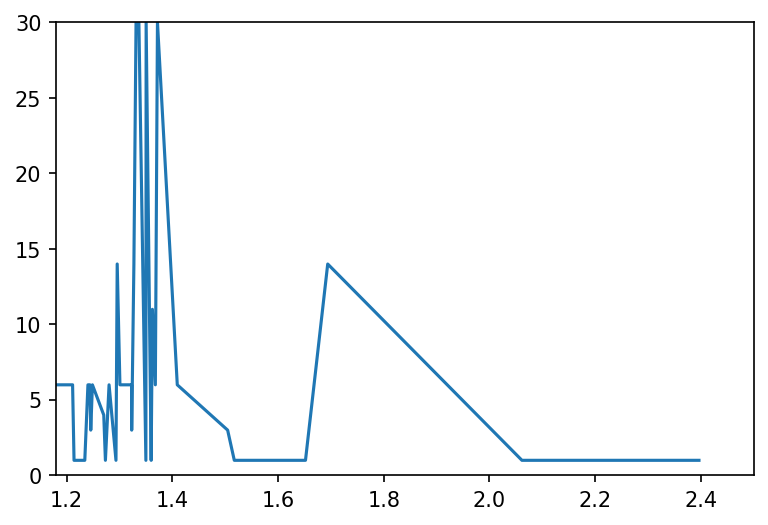

In [177]:
plt.plot(wl,strength)
plt.xlim(1.18,2.5)
plt.ylim(0,30)
plt.rcParams['figure.dpi'] = 150